In [9]:
from Mixture_Models import *

#### Simulating some data

In [10]:
data = make_pinwheel(
    radial_std=0.3,
    tangential_std=0.05,
    num_classes=3,
    num_per_class=100,
    rate=0.4,
    rs=npr.RandomState(0),
)

#### Initializing the model

In [11]:
test_GMM = GMM(data)

#### Initializing the input parameters

In [12]:
npr.seed(10)
init_params = test_GMM.init_params(num_components=3, scale=0.5)
print(init_params)

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'sqrt_covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])}


#### Fitting the model with the above initialization parameters

In [13]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.9 and learning rate = 5e-4
params_store = test_GMM.fit(
    init_params, "grad_descent", learning_rate=0.0005, mass=0.9, maxiter=100
)

Log likelihood -720.8092616186832
Log likelihood -719.9324989689964
Log likelihood -718.274814939572
Log likelihood -715.9300034638668
Log likelihood -712.9900481929888
Log likelihood -709.5458269817977
Log likelihood -705.6880453853835
Log likelihood -701.5082241387773
Log likelihood -697.0995833835279
Log likelihood -692.557653132106
Log likelihood -687.9804054374334
Log likelihood -683.467660563424
Log likelihood -679.1194852214626
Log likelihood -675.0333048263767
Log likelihood -671.2995356451652
Log likelihood -667.9957548102311
Log likelihood -665.1797992207992
Log likelihood -662.8826958402399
Log likelihood -661.1028521459016
Log likelihood -659.8032389258503
Log likelihood -658.9131007549157
Log likelihood -658.3348876031123
Log likelihood -657.9557758247456
Log likelihood -657.6618055087696
Log likelihood -657.3518342045413
Log likelihood -656.9484866199953
Log likelihood -656.4040216179089
Log likelihood -655.7002839476835
Log likelihood -654.8433206006827
Log likelihood -6

#### Posthoc analysis

In [14]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params, input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt in zip(*unpacked_params):
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2 * np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], "-", alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], "k.")
    ax.plot(input_data[:, 0], input_data[:, 1], "k.")

    plt.show()

likelihood -720.8092616186832
aic,bic 1475.6185232373664 1538.5828253065217


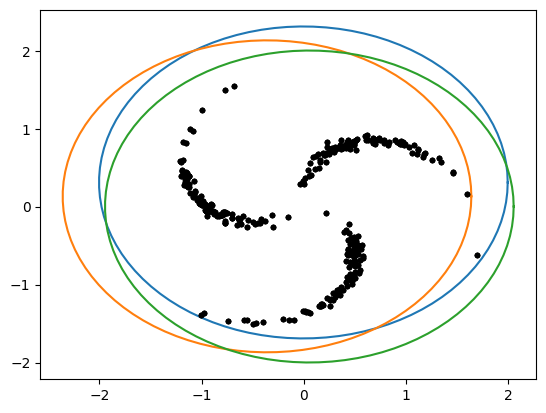

likelihood -719.9324989689964
aic,bic 1473.8649979379927 1536.829300007148


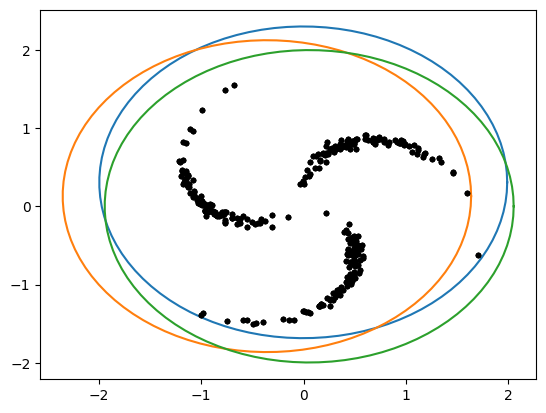

likelihood -718.274814939572
aic,bic 1470.549629879144 1533.5139319482994


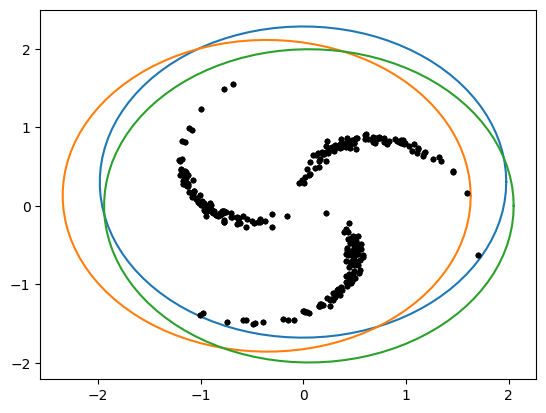

likelihood -715.9300034638668
aic,bic 1465.8600069277336 1528.824308996889


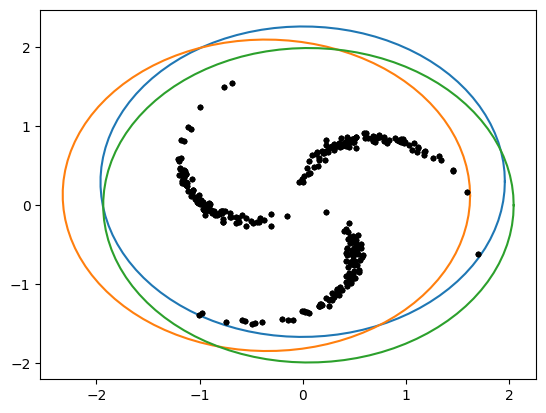

likelihood -712.9900481929888
aic,bic 1459.9800963859775 1522.9443984551328


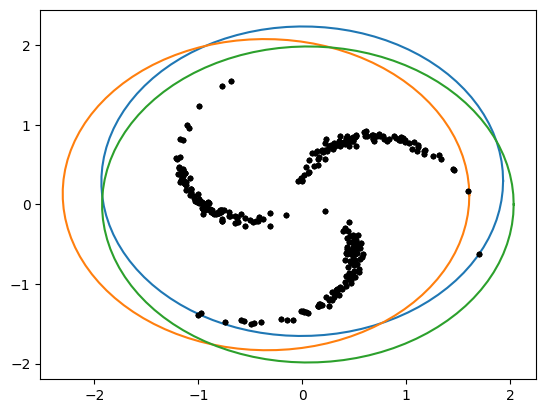

likelihood -709.5458269817977
aic,bic 1453.0916539635955 1516.0559560327508


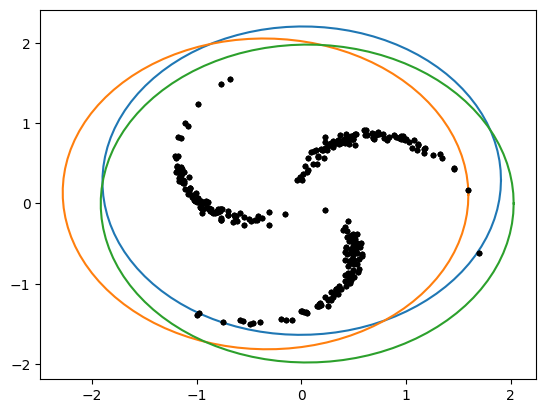

likelihood -705.6880453853835
aic,bic 1445.376090770767 1508.3403928399223


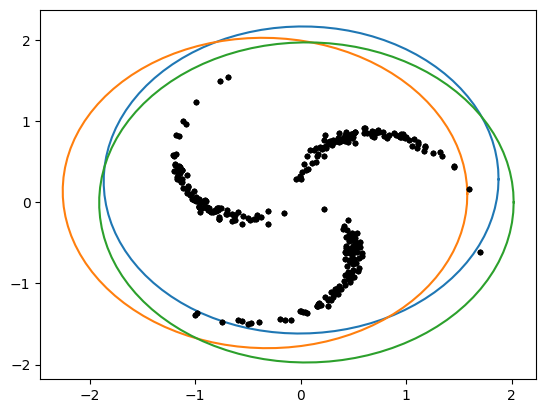

likelihood -701.5082241387773
aic,bic 1437.0164482775547 1499.98075034671


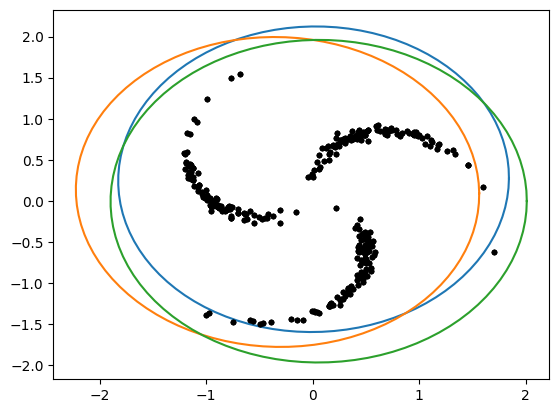

likelihood -697.0995833835279
aic,bic 1428.1991667670559 1491.1634688362112


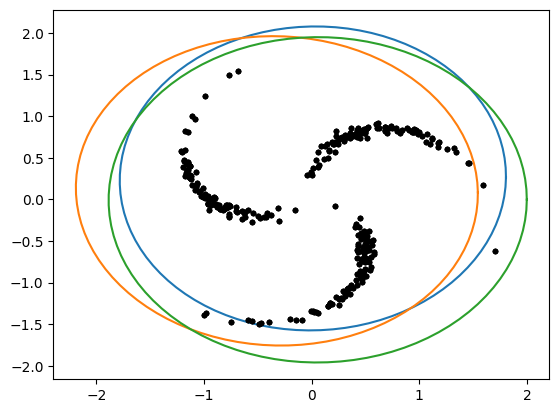

likelihood -692.557653132106
aic,bic 1419.115306264212 1482.0796083333673


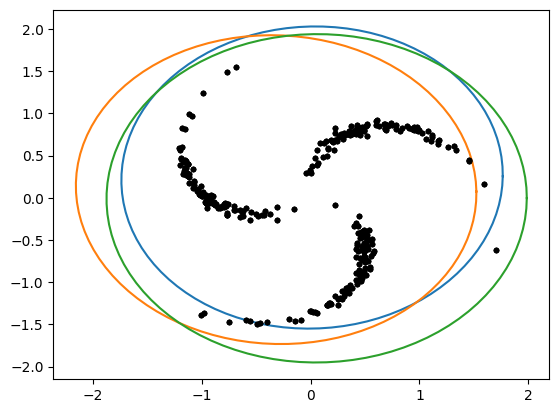

likelihood -687.9804054374334
aic,bic 1409.9608108748669 1472.9251129440222


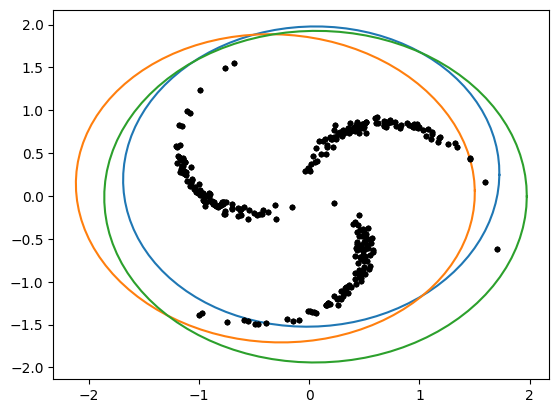

likelihood -683.467660563424
aic,bic 1400.935321126848 1463.8996231960034


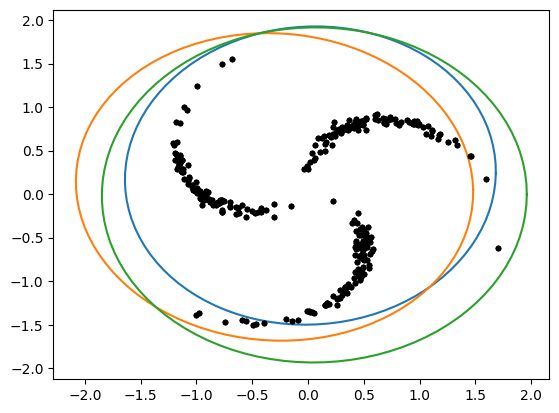

likelihood -679.1194852214626
aic,bic 1392.2389704429252 1455.2032725120805


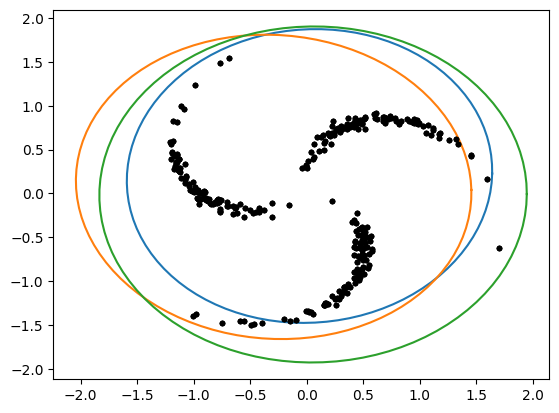

likelihood -675.0333048263767
aic,bic 1384.0666096527534 1447.0309117219088


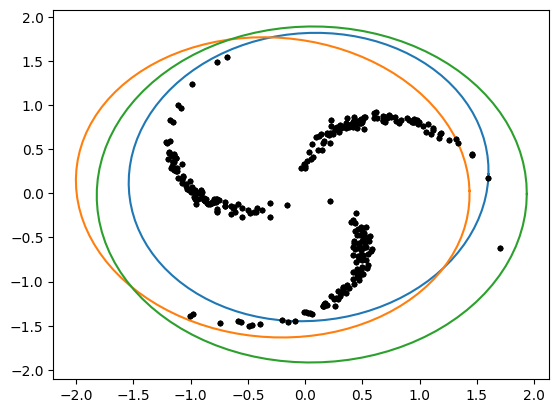

likelihood -671.2995356451652
aic,bic 1376.5990712903304 1439.5633733594857


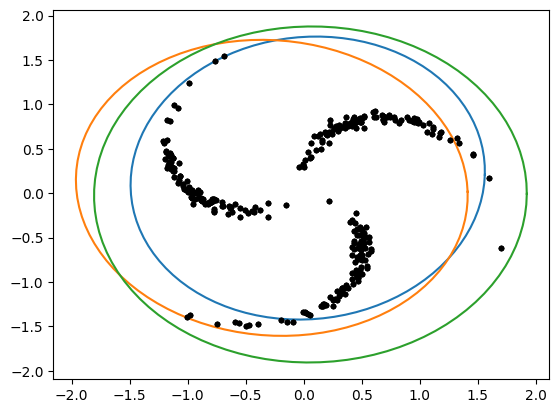

likelihood -667.9957548102311
aic,bic 1369.9915096204622 1432.9558116896176


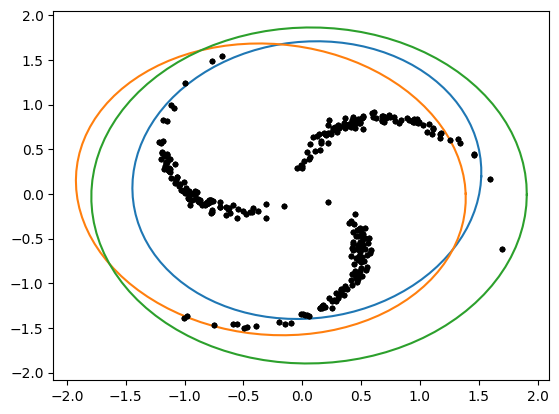

likelihood -665.1797992207992
aic,bic 1364.3595984415983 1427.3239005107537


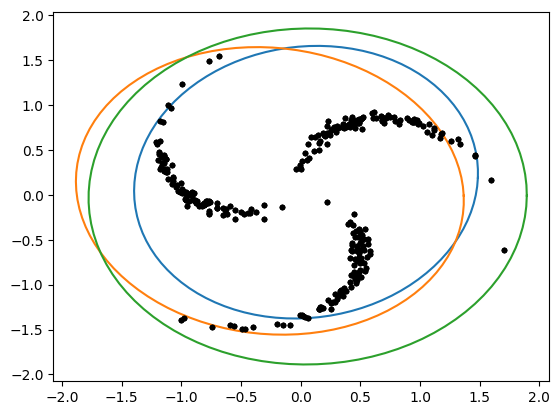

likelihood -662.8826958402399
aic,bic 1359.7653916804798 1422.729693749635


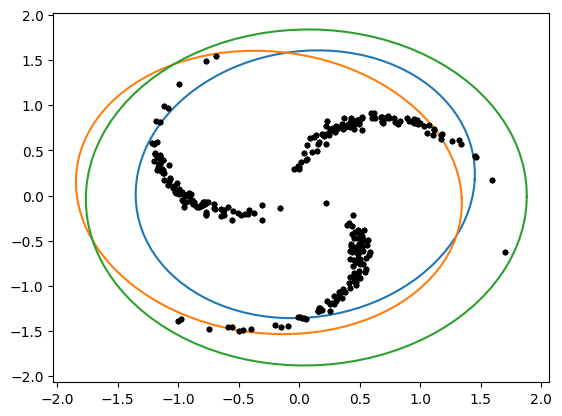

likelihood -661.1028521459016
aic,bic 1356.2057042918032 1419.1700063609585


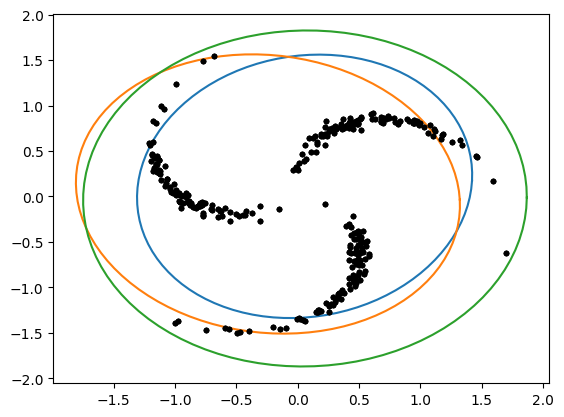

likelihood -659.8032389258503
aic,bic 1353.6064778517007 1416.570779920856


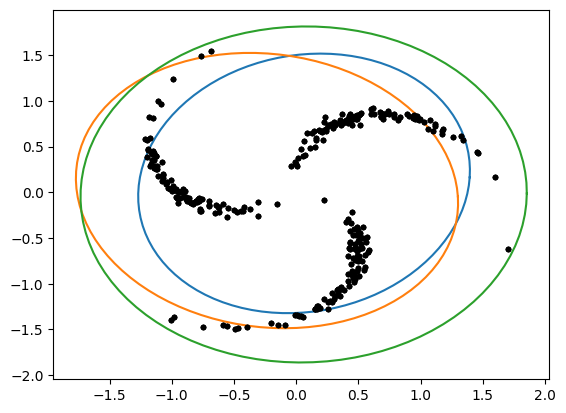

likelihood -658.9131007549157
aic,bic 1351.8262015098314 1414.7905035789868


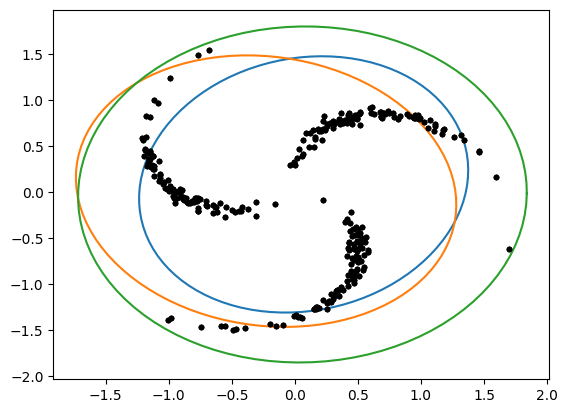

likelihood -658.3348876031123
aic,bic 1350.6697752062246 1413.63407727538


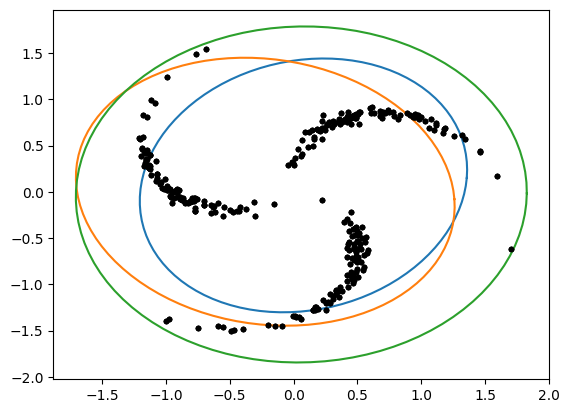

likelihood -657.9557758247456
aic,bic 1349.9115516494912 1412.8758537186466


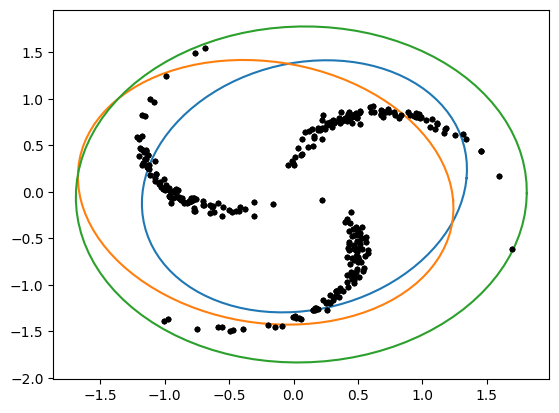

likelihood -657.6618055087696
aic,bic 1349.3236110175392 1412.2879130866945


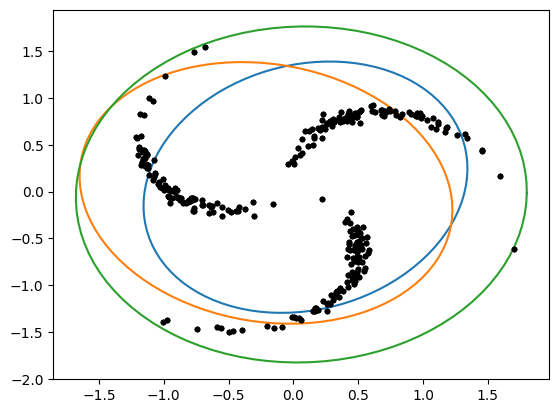

likelihood -657.3518342045413
aic,bic 1348.7036684090826 1411.667970478238


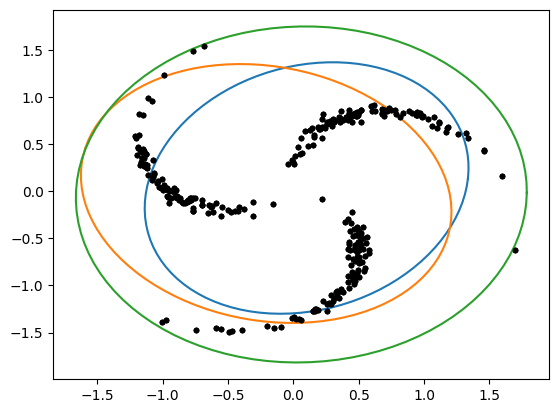

likelihood -656.9484866199953
aic,bic 1347.8969732399905 1410.8612753091459


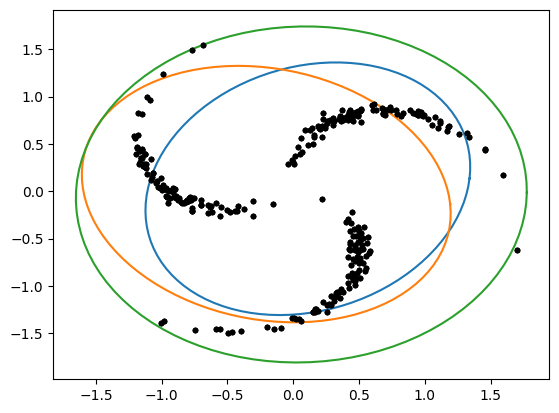

likelihood -656.4040216179089
aic,bic 1346.8080432358179 1409.7723453049732


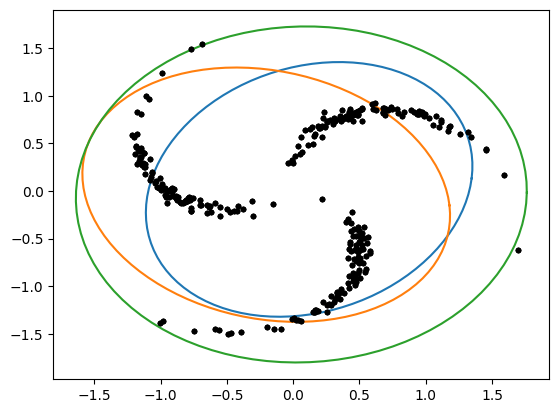

likelihood -655.7002839476835
aic,bic 1345.400567895367 1408.3648699645223


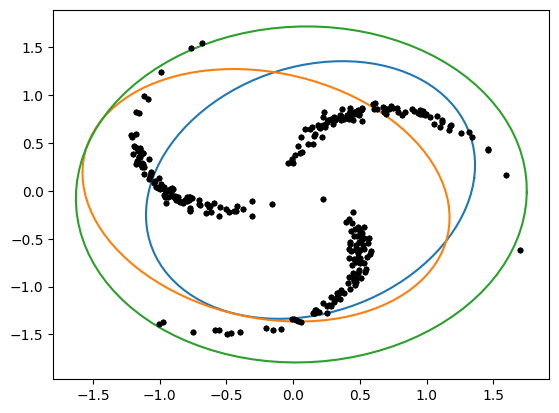

likelihood -654.8433206006827
aic,bic 1343.6866412013653 1406.6509432705207


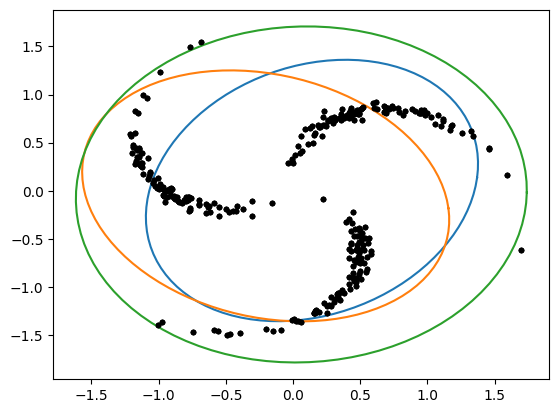

likelihood -653.8544379608578
aic,bic 1341.7088759217156 1404.673177990871


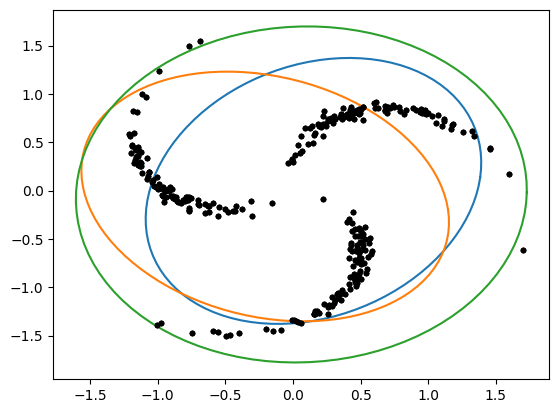

likelihood -652.7600866545947
aic,bic 1339.5201733091894 1402.4844753783448


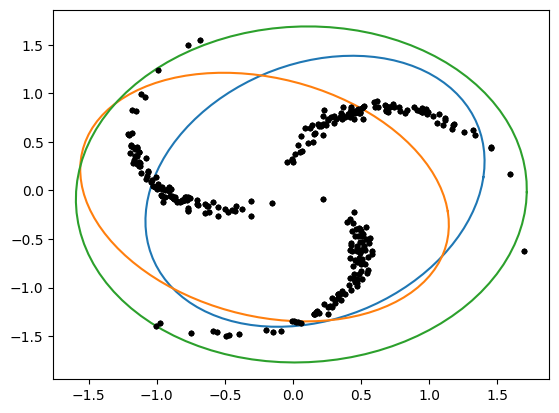

likelihood -651.5827966792071
aic,bic 1337.1655933584143 1400.1298954275696


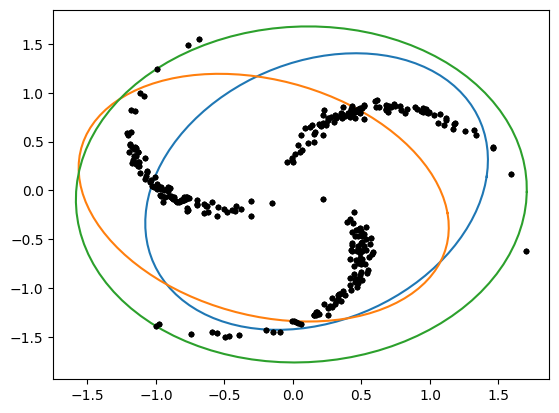

likelihood -650.3345799798044
aic,bic 1334.6691599596088 1397.6334620287641


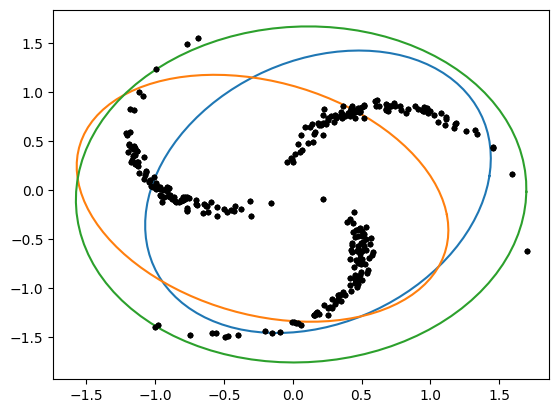

likelihood -649.0131686118611
aic,bic 1332.0263372237223 1394.9906392928776


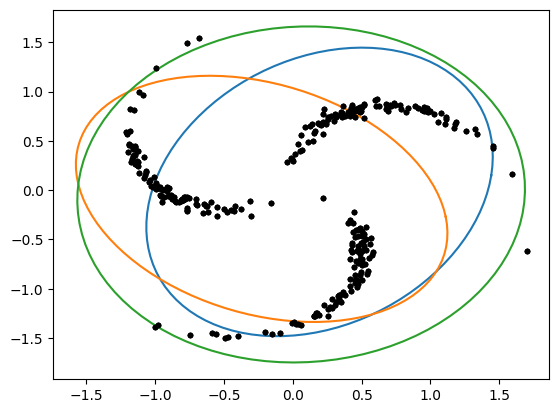

likelihood -647.6005850730753
aic,bic 1329.2011701461506 1392.165472215306


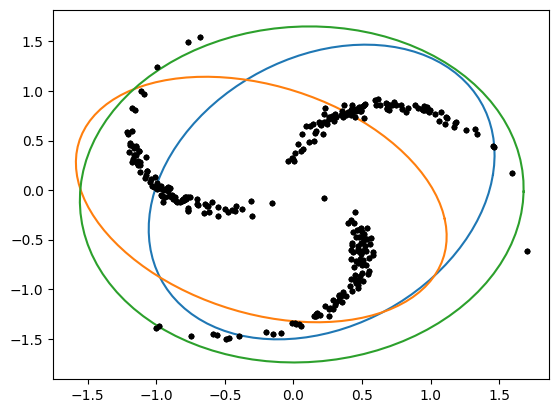

likelihood -646.0630742951746
aic,bic 1326.1261485903492 1389.0904506595045


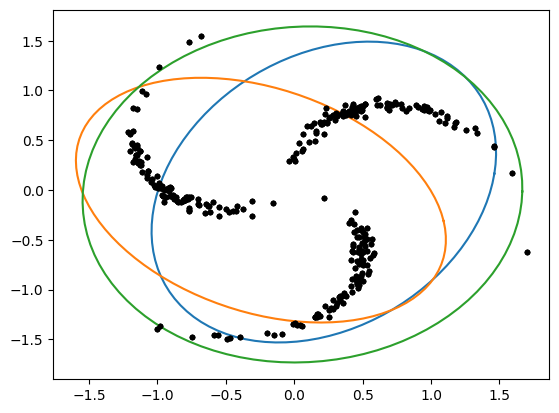

likelihood -644.3513504892028
aic,bic 1322.7027009784056 1385.667003047561


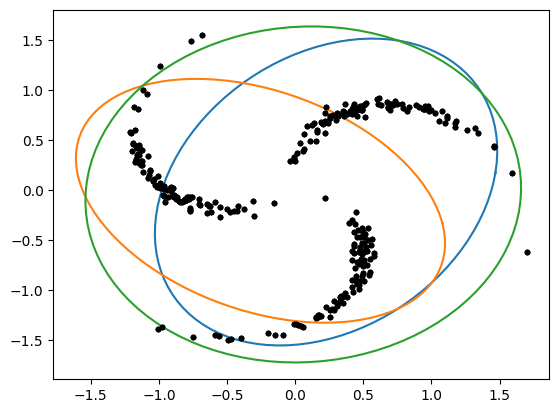

likelihood -642.4002714559439
aic,bic 1318.8005429118878 1381.764844981043


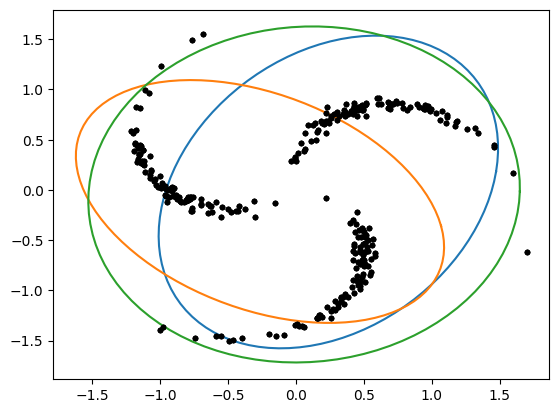

likelihood -640.12727888677
aic,bic 1314.25455777354 1377.2188598426953


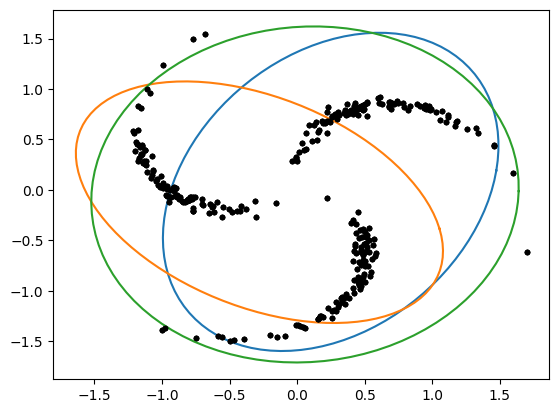

likelihood -637.4291244751488
aic,bic 1308.8582489502976 1371.822551019453


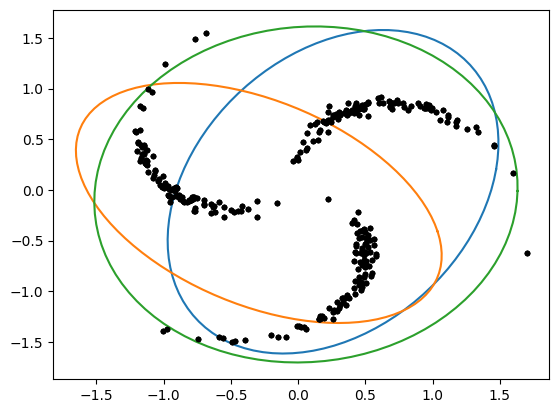

likelihood -634.176494153884
aic,bic 1302.352988307768 1365.3172903769234


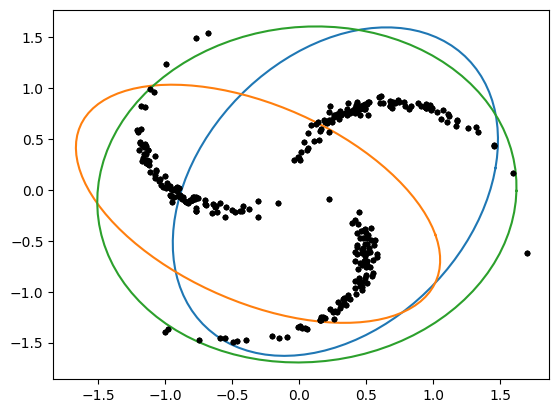

likelihood -630.2061599145472
aic,bic 1294.4123198290945 1357.3766218982498


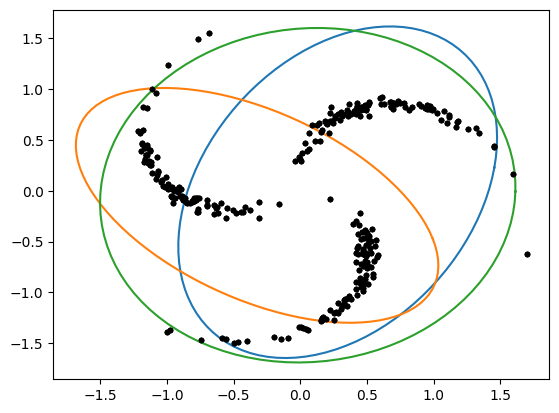

likelihood -625.3104086368007
aic,bic 1284.6208172736015 1347.5851193427568


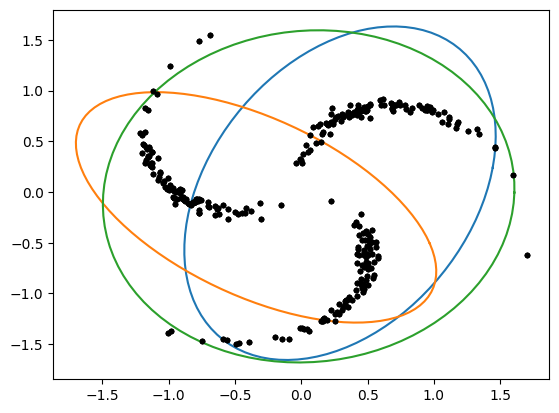

likelihood -619.2247622941566
aic,bic 1272.4495245883131 1335.4138266574685


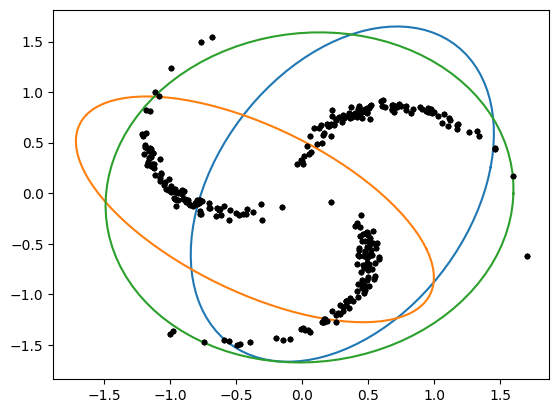

likelihood -611.6214914638102
aic,bic 1257.2429829276205 1320.2072849967758


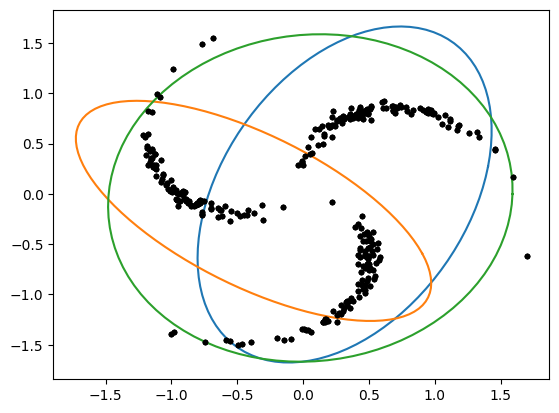

likelihood -602.1343359733473
aic,bic 1238.2686719466947 1301.23297401585


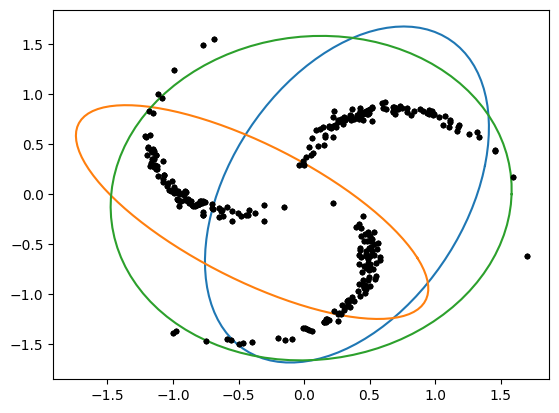

likelihood -590.4502973454539
aic,bic 1214.9005946909078 1277.8648967600632


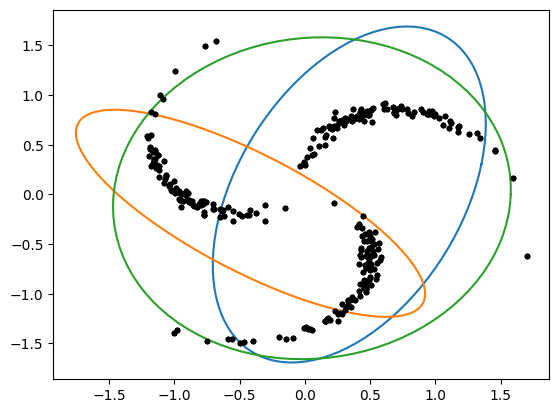

likelihood -576.5214283372425
aic,bic 1187.042856674485 1250.0071587436403


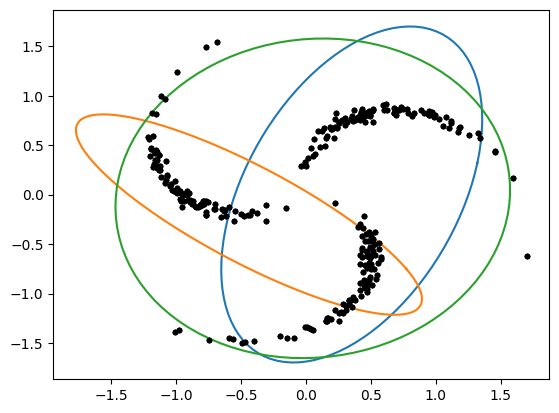

likelihood -560.8763435657727
aic,bic 1155.7526871315454 1218.7169892007007


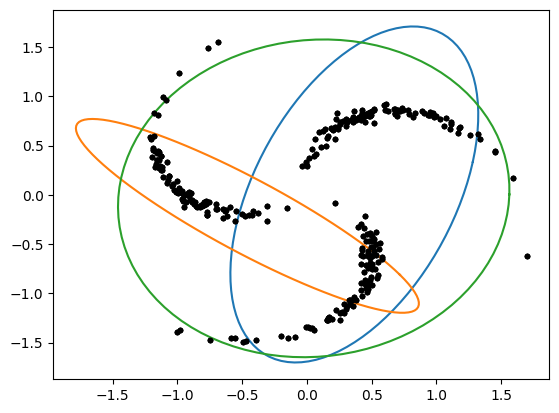

likelihood -545.7548815517194
aic,bic 1125.509763103439 1188.4740651725942


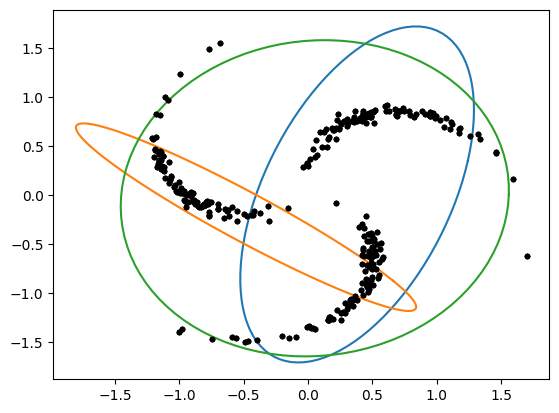

likelihood -557.5787187864312
aic,bic 1149.1574375728624 1212.1217396420177


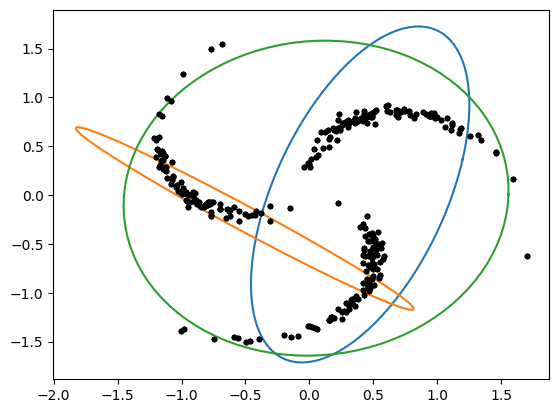

likelihood -552.9499535266336
aic,bic 1139.8999070532673 1202.8642091224226


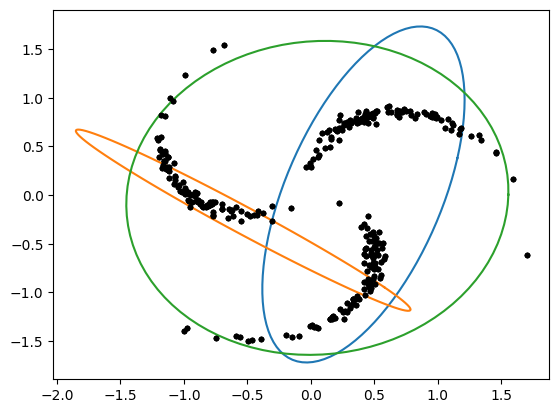

likelihood -542.0578600300125
aic,bic 1118.115720060025 1181.0800221291804


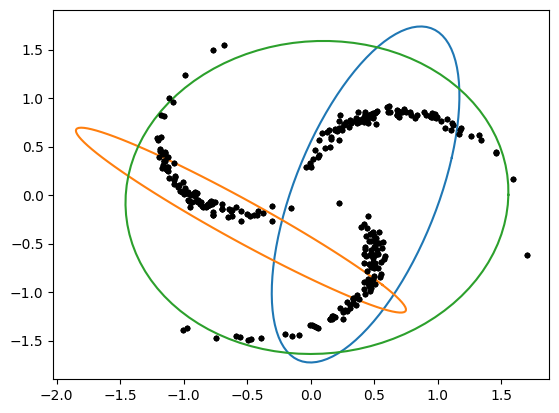

likelihood -538.7952832949006
aic,bic 1111.5905665898013 1174.5548686589566


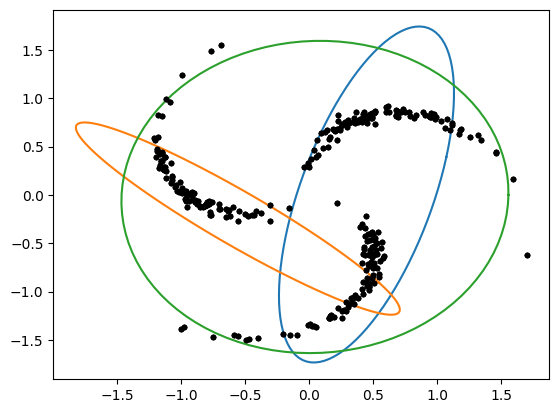

likelihood -540.0509343382073
aic,bic 1114.1018686764146 1177.06617074557


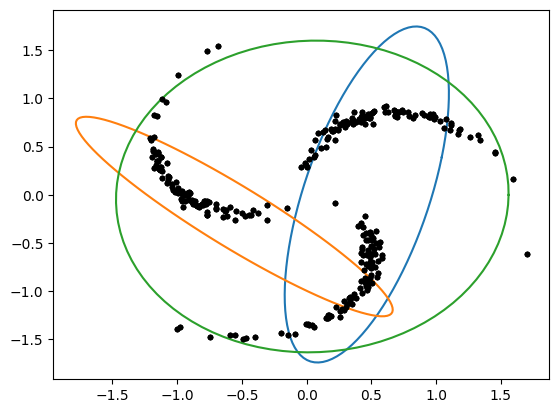

likelihood -540.1047083135685
aic,bic 1114.209416627137 1177.1737186962923


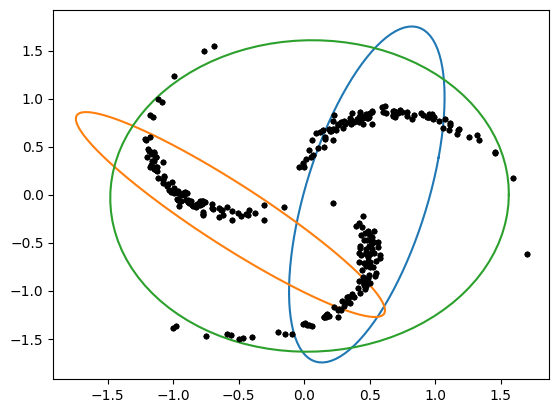

likelihood -538.3920941446918
aic,bic 1110.7841882893836 1173.748490358539


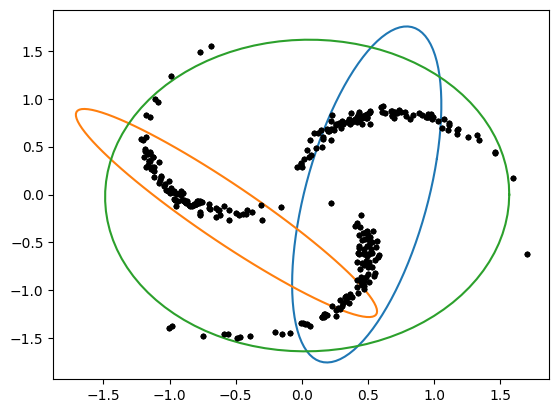

likelihood -534.537647432514
aic,bic 1103.075294865028 1166.0395969341832


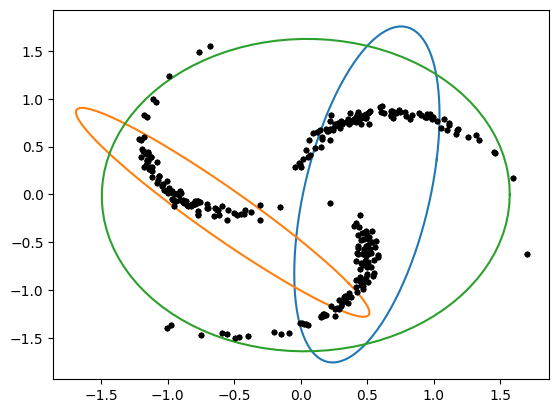

likelihood -525.1460662219934
aic,bic 1084.2921324439867 1147.256434513142


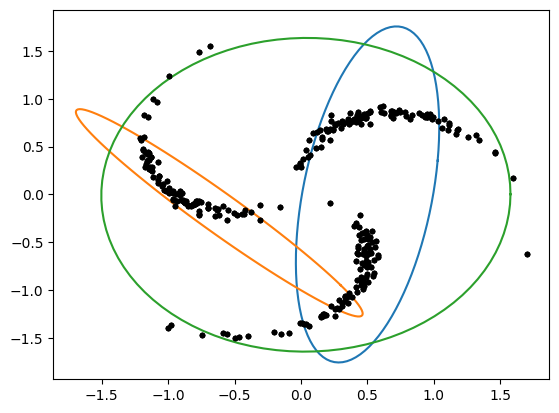

likelihood -517.0542202917709
aic,bic 1068.1084405835418 1131.0727426526971


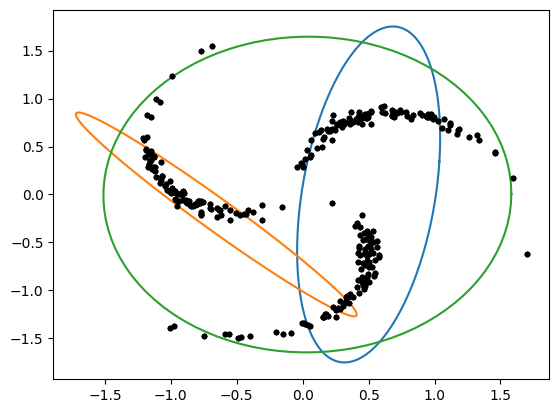

likelihood -526.1145493153922
aic,bic 1086.2290986307844 1149.1934006999397


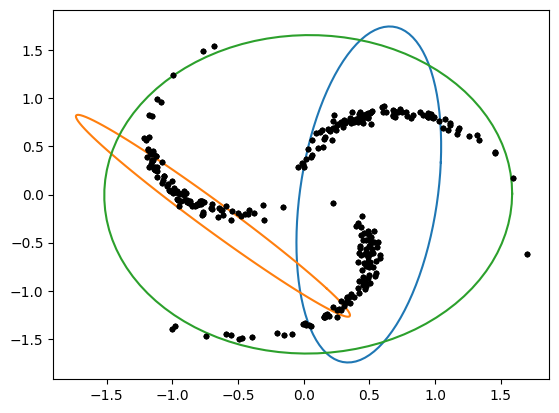

likelihood -518.848930048831
aic,bic 1071.697860097662 1134.6621621668173


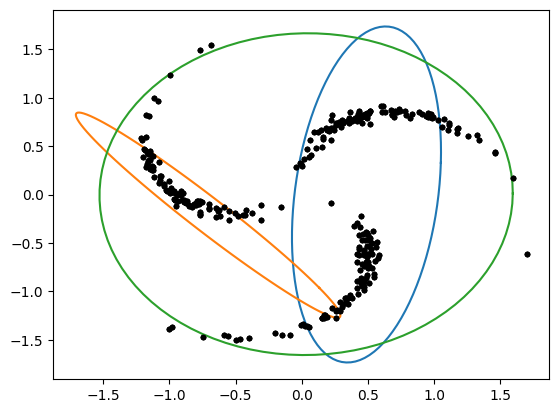

likelihood -512.8972178891287
aic,bic 1059.7944357782574 1122.7587378474127


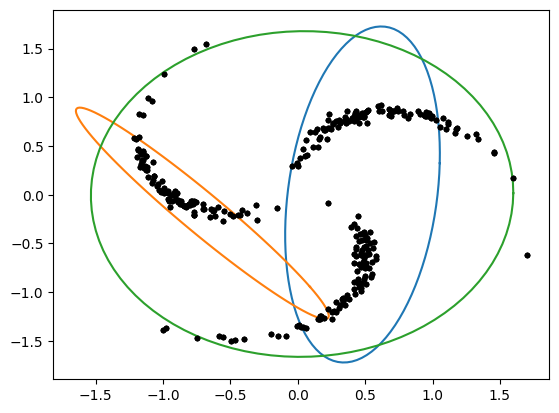

likelihood -514.439105208505
aic,bic 1062.87821041701 1125.8425124861653


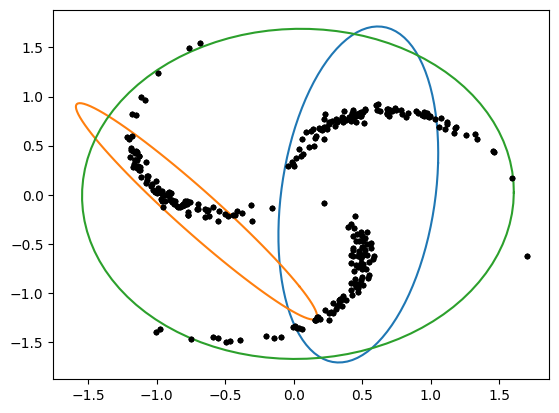

likelihood -515.9467825935965
aic,bic 1065.893565187193 1128.8578672563483


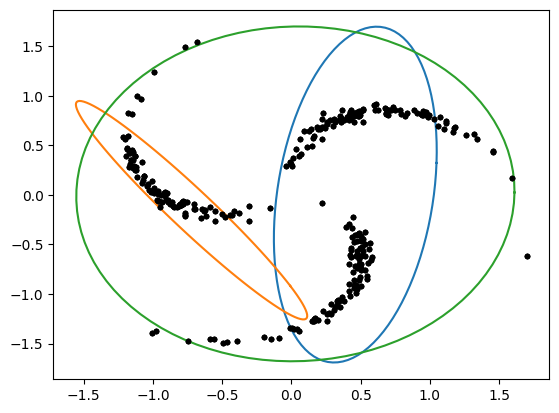

likelihood -510.42814687646216
aic,bic 1054.8562937529243 1117.8205958220797


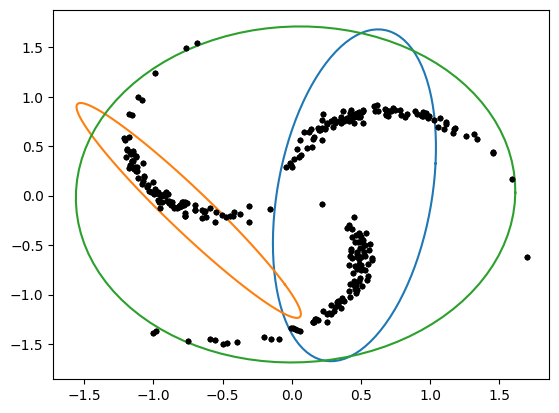

likelihood -506.3093379899209
aic,bic 1046.6186759798418 1109.5829780489971


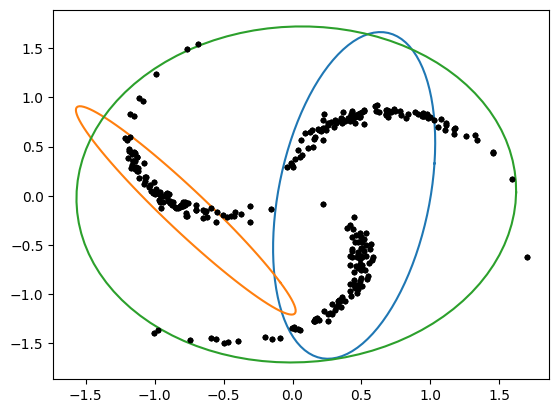

likelihood -504.6531478482634
aic,bic 1043.3062956965268 1106.2705977656822


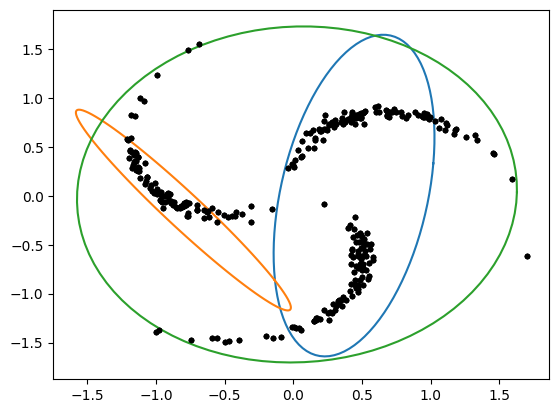

likelihood -503.71436357935886
aic,bic 1041.4287271587177 1104.393029227873


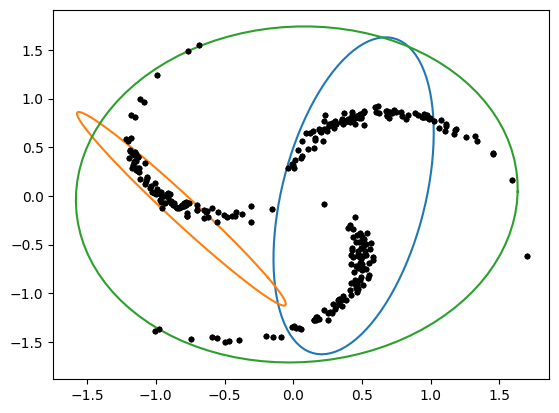

likelihood -499.79813193959666
aic,bic 1033.5962638791934 1096.5605659483488


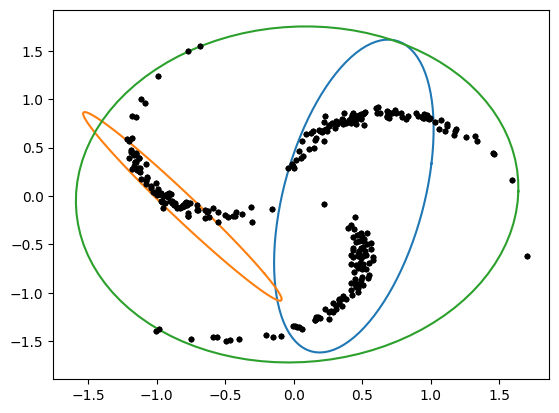

likelihood -496.7932233316701
aic,bic 1027.5864466633402 1090.5507487324955


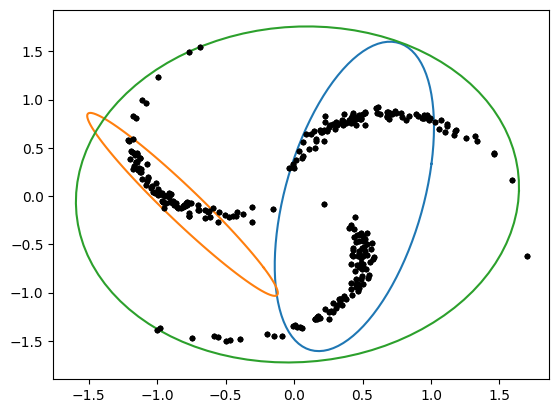

likelihood -495.8327695607124
aic,bic 1025.665539121425 1088.6298411905802


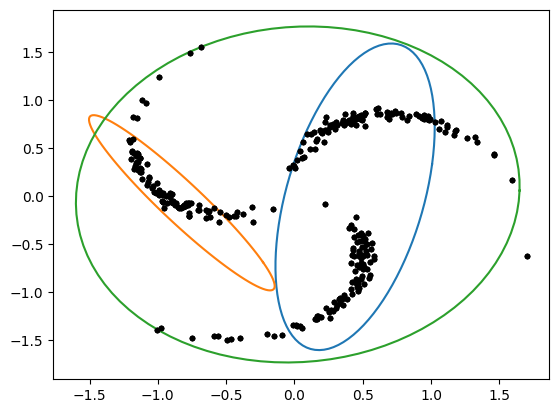

likelihood -493.04689889900874
aic,bic 1020.0937977980175 1083.0580998671728


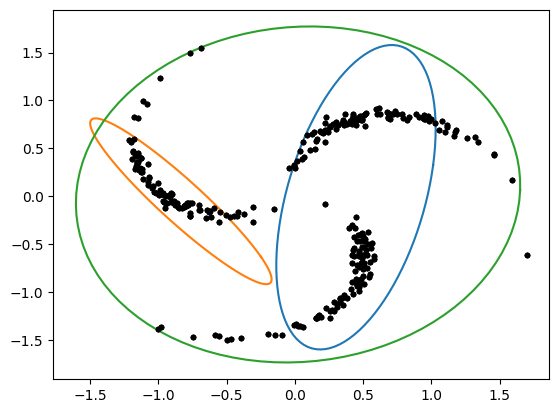

likelihood -487.3812837574901
aic,bic 1008.7625675149802 1071.7268695841356


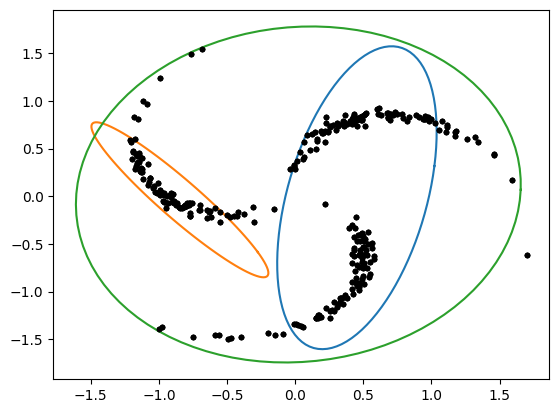

likelihood -480.8114423430239
aic,bic 995.6228846860478 1058.5871867552032


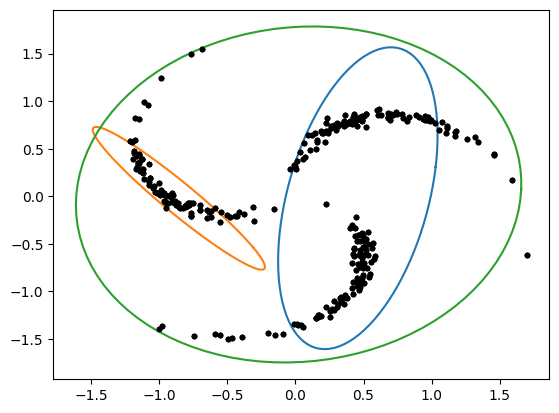

likelihood -481.9367513458118
aic,bic 997.8735026916236 1060.837804760779


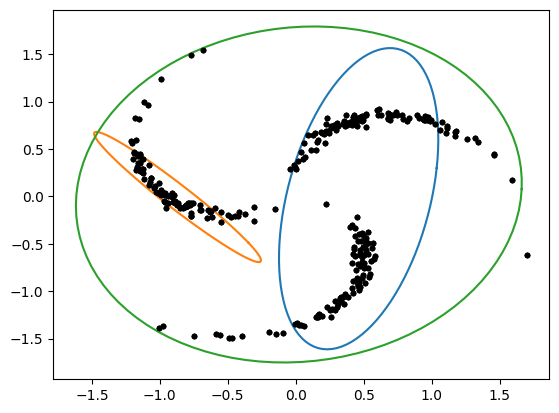

likelihood -474.17574082901194
aic,bic 982.3514816580239 1045.3157837271792


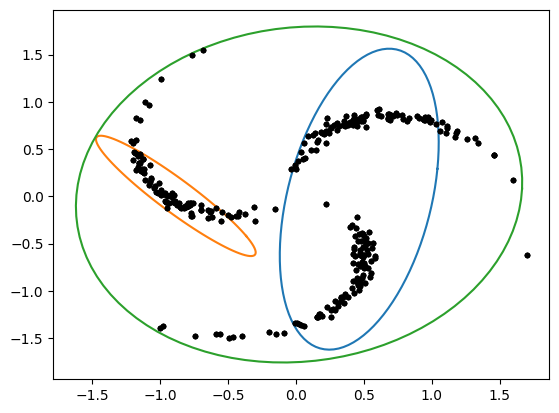

likelihood -472.88078575050895
aic,bic 979.7615715010179 1042.7258735701732


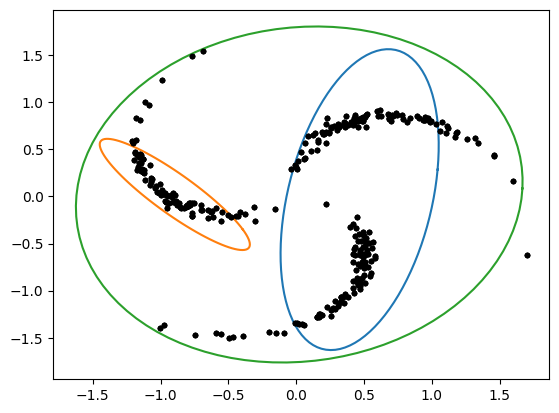

likelihood -469.2855044181586
aic,bic 972.5710088363172 1035.5353109054727


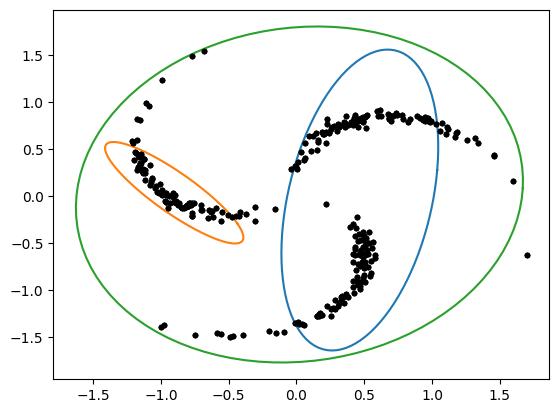

likelihood -464.3911415254778
aic,bic 962.7822830509556 1025.746585120111


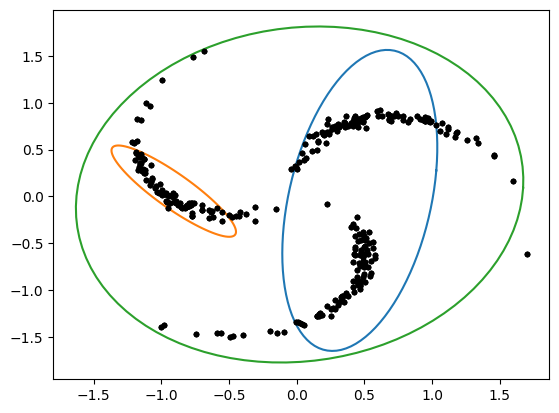

likelihood -464.12620068500365
aic,bic 962.2524013700073 1025.2167034391628


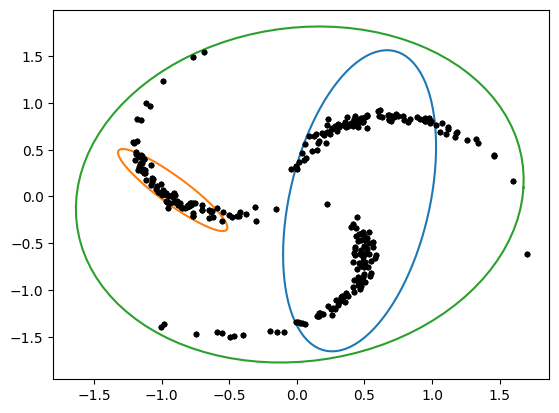

likelihood -459.5986336992521
aic,bic 953.1972673985042 1016.1615694676597


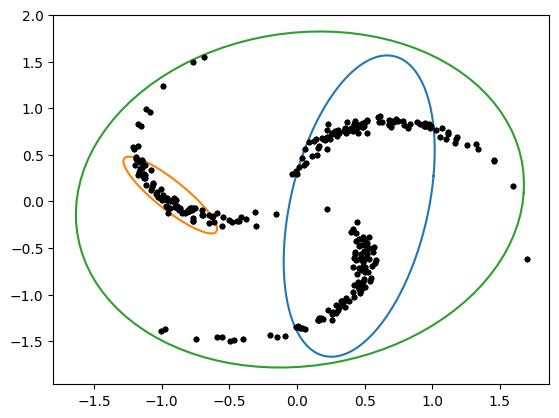

likelihood -463.210835853012
aic,bic 960.421671706024 1023.3859737751794


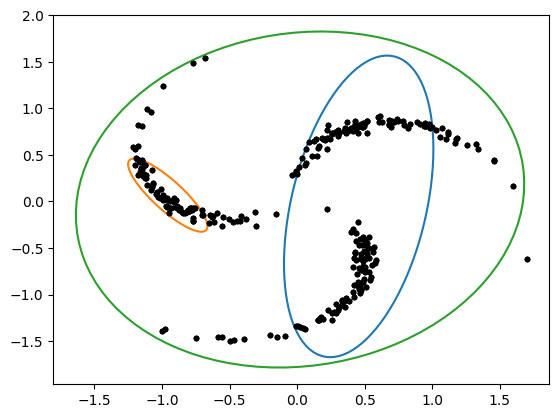

likelihood -467.0731693515859
aic,bic 968.1463387031718 1031.110640772327


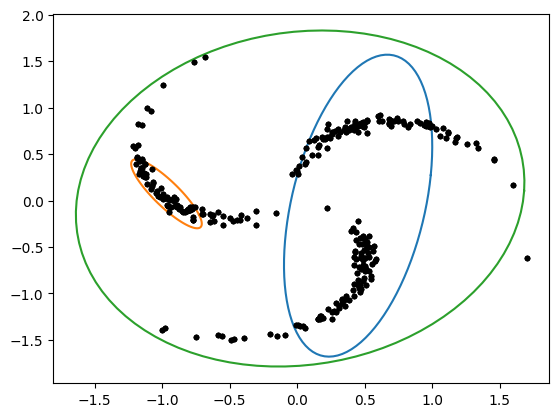

likelihood -466.3786838127068
aic,bic 966.7573676254136 1029.721669694569


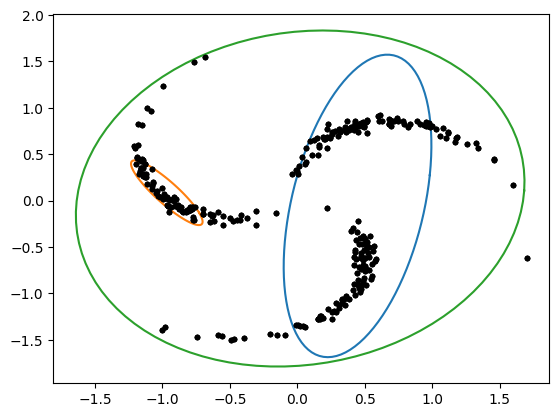

likelihood -464.6804267456888
aic,bic 963.3608534913776 1026.325155560533


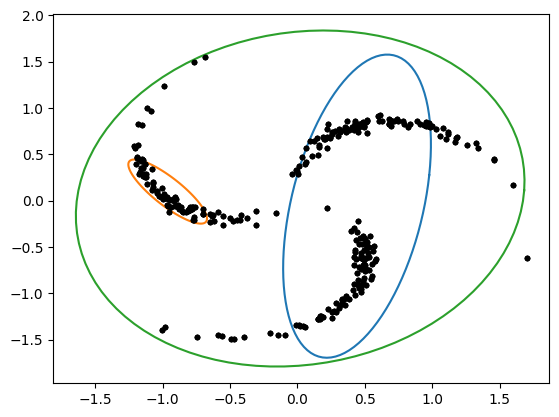

likelihood -464.2275296339129
aic,bic 962.4550592678258 1025.4193613369812


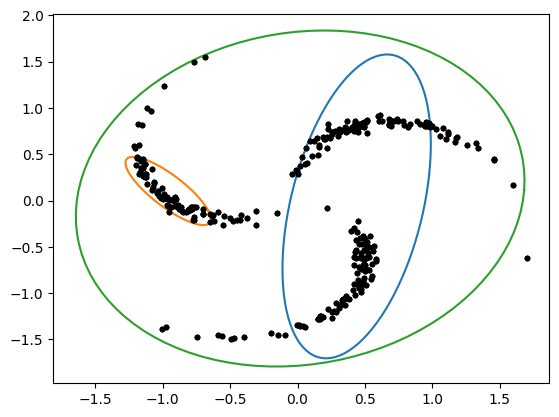

likelihood -460.8368360423058
aic,bic 955.6736720846116 1018.637974153767


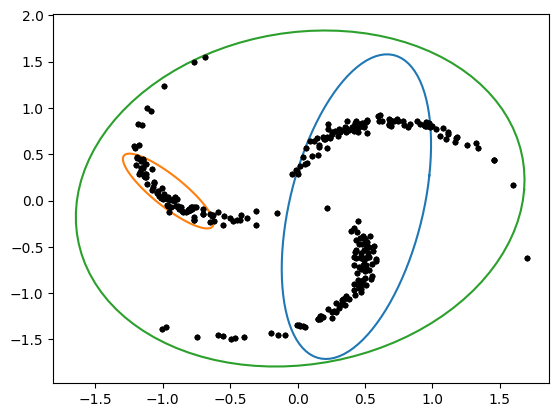

likelihood -458.54663676806274
aic,bic 951.0932735361255 1014.0575756052809


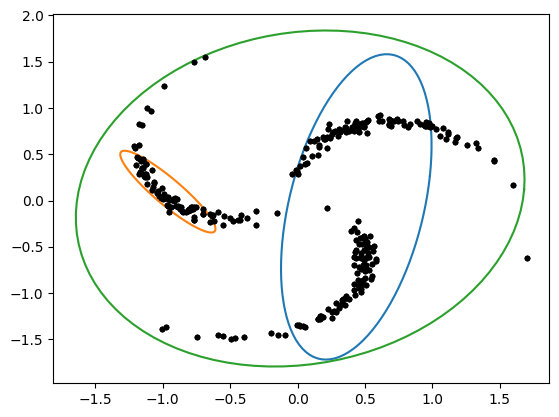

likelihood -459.7961376646298
aic,bic 953.5922753292596 1016.556577398415


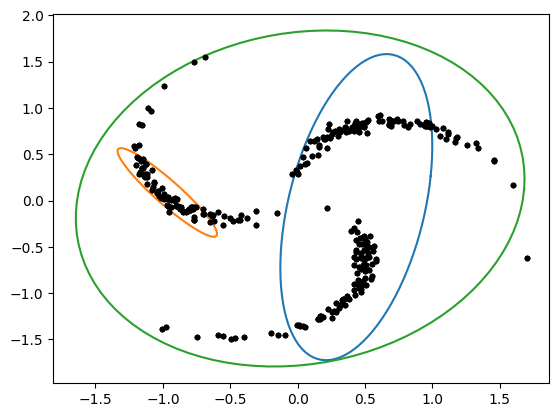

likelihood -460.32717742927554
aic,bic 954.6543548585511 1017.6186569277065


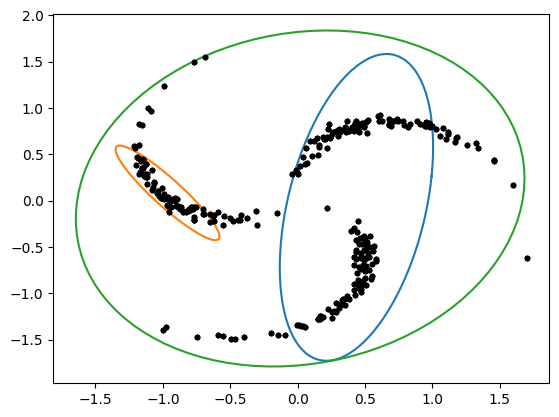

likelihood -460.4619067713055
aic,bic 954.923813542611 1017.8881156117665


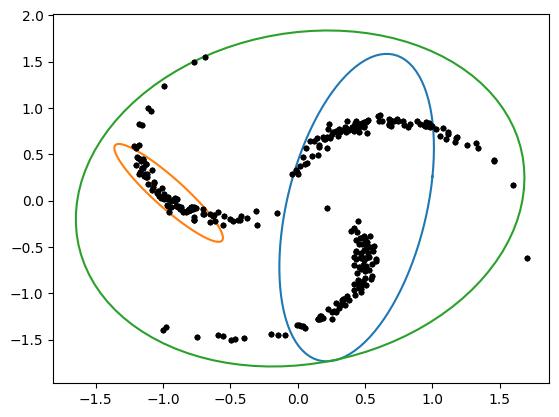

likelihood -460.431358782867
aic,bic 954.862717565734 1017.8270196348894


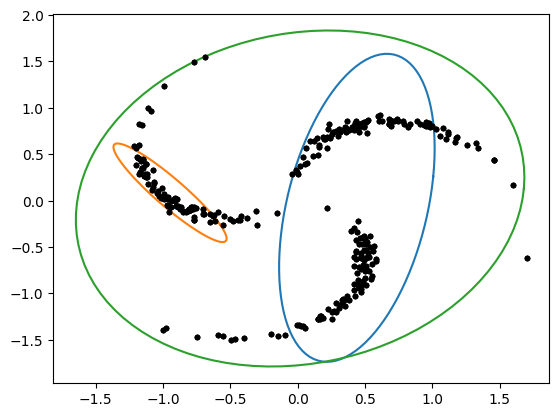

likelihood -461.00300583656076
aic,bic 956.0060116731215 1018.970313742277


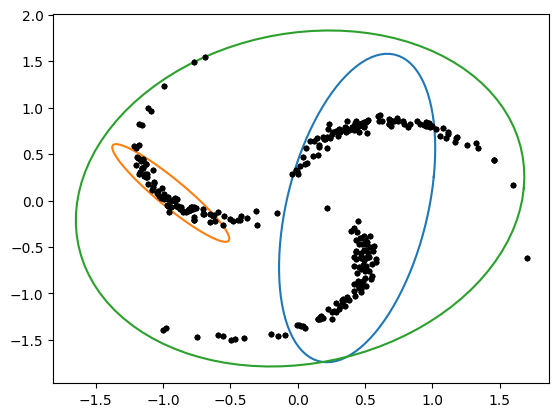

likelihood -460.31408472166686
aic,bic 954.6281694433337 1017.5924715124892


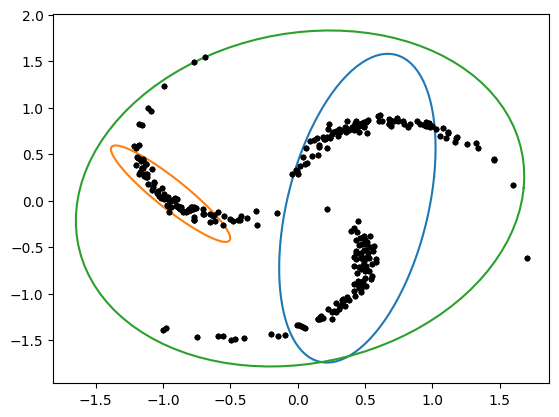

likelihood -460.4857895176706
aic,bic 954.9715790353412 1017.9358811044966


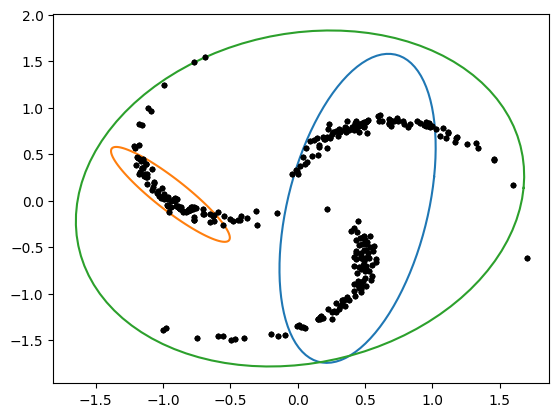

likelihood -459.6079258588801
aic,bic 953.2158517177602 1016.1801537869156


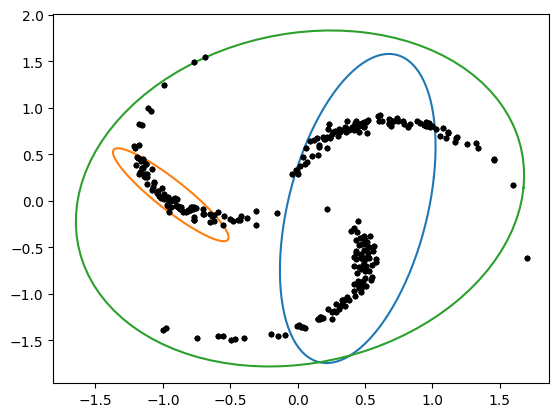

likelihood -458.52859219602897
aic,bic 951.0571843920579 1014.0214864612134


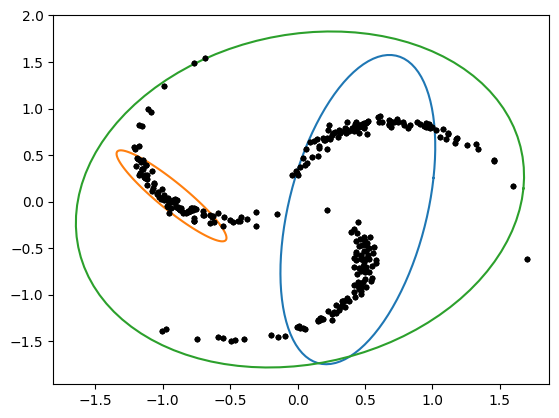

likelihood -458.0932767136611
aic,bic 950.1865534273222 1013.1508554964777


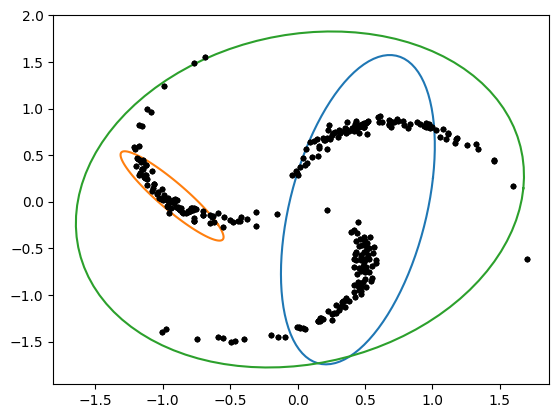

likelihood -457.7627030996754
aic,bic 949.5254061993508 1012.4897082685062


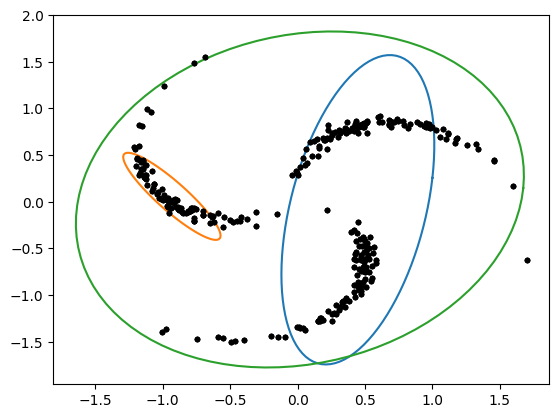

In [15]:
for params in params_store:
    print("likelihood", test_GMM.likelihood(params))
    print("aic,bic", test_GMM.aic(params), test_GMM.bic(params))

    draw_clusters(test_GMM.unpack_params(params), data)

In [16]:
### Final labels

np.array(test_GMM.labels(data, params_store[-1]))

array([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d